# Kinetic Model for Estimation of Social Inequality

<img src="Inequality.jpeg">

> В некотором городе живет $N \gg 1$ жителей (четное число). В начальный момент у каждого
жителя имеется по $S$ монеток. Каждый день жители случайно разбиваются на пары. В
каждой паре жители скидываются по монетке (если один или оба участника банкроты, то
банкрот не скидывается, в то время, как не банкрот, в любом случае, обязан скинуть
монетку). Далее в каждой паре случайно разыгрывается победитель, который и забирает
“призовой фонд”.


## Estimate

$c_s(t)$ — proportion of citizens, having exactly $s$ coins at $t^{th}$ day $(0 \leq s \leq SN)$

Then:

$$(1) \quad \exists a > 0: \quad \forall \sigma > 0, t \geq a(S)\ln N \quad \rightarrow \quad 
\mathbb{P} \left( \left\Vert c(t) - c^* \right\Vert_2 \geq \frac{2\sqrt{2} + 4 \sqrt{\ln \left( \sigma^{-1}\right)}}{\sqrt{N}} \right) \leq \sigma$$


$$(2) \quad \exists b, D > 0: \quad \forall \sigma > 0, t \geq b(S)\ln N \quad \rightarrow \quad 
\mathbb{P} \left( \left\Vert c(t) - c^* \right\Vert_1 \geq D \sqrt{ \frac{\ln^2 N + \ln \left( \sigma^{-1}\right)}{N}} \right) \leq \sigma$$

where $\quad c_s^* \simeq C \exp \left( -s / S \right), \quad С \simeq 1 / S$

## Pareto distribution (Type I)

$$\xi \sim Pareto(\alpha, \sigma)$$

$$\alpha, \sigma > 0$$

$$F_\xi(x) = \left\{ \begin{array}{ll}
                     1 - \left( \frac{x}{\sigma} \right) ^{-\alpha}, \quad x \geq \sigma\\
                     0, \quad x < \sigma
                     \end{array}\right.$$

## Lomax distribution

* Pareto Type I shifted
* Pareto Type II with $\mu=0$

$$\xi \sim Lomax(\alpha, \lambda)$$

$$\alpha, \lambda > 0$$

$$F_\xi(x) = \left\{ \begin{array}{ll}
                     1 - \left(1 + \frac{x}{\lambda}\right) ^{-\alpha}, \quad x \geq \lambda\\
                     0, \quad x < \lambda
                     \end{array}\right.$$

In practice, this will be exactly this distribution, since every citizens have $\geq 0$ coins.

__States that $c_s(t) \sim Lomax$__

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

import numpy as np
from scipy.stats import lomax, pareto

<IPython.core.display.Javascript object>


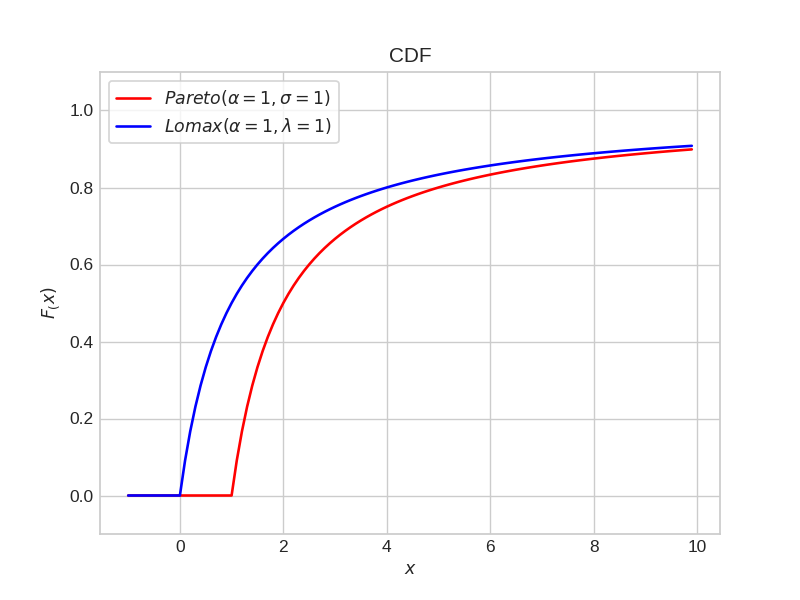

In [2]:
fig, ax = plt.subplots(1,1)
ax.set_title("CDF")
ax.set_xlabel("$x$")
ax.set_ylabel("$F_(x)$")
ax.set_ylim(-0.1, 1.1)

xs = np.arange(-1, 10, 0.1)
pareto_ys = [pareto.cdf(x, 1) for x in xs]
lomax_ys = [lomax.cdf(x, 1) for x in xs]

ax.plot(xs, pareto_ys, 'r', label=r'$Pareto(\alpha=1, \sigma=1)$')
ax.plot(xs, lomax_ys, 'b', label=r'$Lomax(\alpha=1, \lambda=1)$')
ax.legend(frameon=True, loc='upper left')

plt.show()

## Model

In [3]:
import soc

* Initializes with $N$ and $S$ values:

In [4]:
N = 1000     # num of people
S = 100      # initial money

model = soc.Model(N, S)

* Initializes with $N$ and array of size $N$ with initial coin distribution:

In [5]:
N = 1000
a = np.random.randint(0, 100, size=N)

model = soc.Model(N, stack=a)

* Evaluate one day forward:

In [6]:
model.step()

* Evaluate a number of days forward:

In [7]:
model.run(days=10)

* Get current coins distribution and day number:

In [8]:
model.stack[::100], model.t

(array([56, 74, 39, 12, 42, 64, 67, 99, 90, 13]), 11)

* Get emperical distribution and emperical probability:

In [9]:
model.EDF(100), model.EPF(100)

(0.99, 0.002)

Emperical probability is exactly $c_s(t)$ for $t$ taken as current model state.

## Naive run

Let's run model and check if EDF tends to Lomax CDF with $\alpha\rightarrow\infty,\lambda\rightarrow\infty$:

In [12]:
N = 1000     # num of people
S = 100      # initial money

model = soc.Model(N, S)

days = 35000  # Number of days
period = 100  # Update plot each ... day

To express that $\alpha\rightarrow\infty,\lambda\rightarrow\infty$, let's simply take $\alpha=10000000000, \sigma=1000000000000$.

_Plot is dynamic: you can run this cell and see blue curve approaching red one._

In [13]:
alpha = 10000000000
lambda_ = 1000000000000

__! My mistake:__ This parameters need precise investigation: $\alpha=\alpha(N, S)$, $\sigma=\sigma(N, S)$

<IPython.core.display.Javascript object>


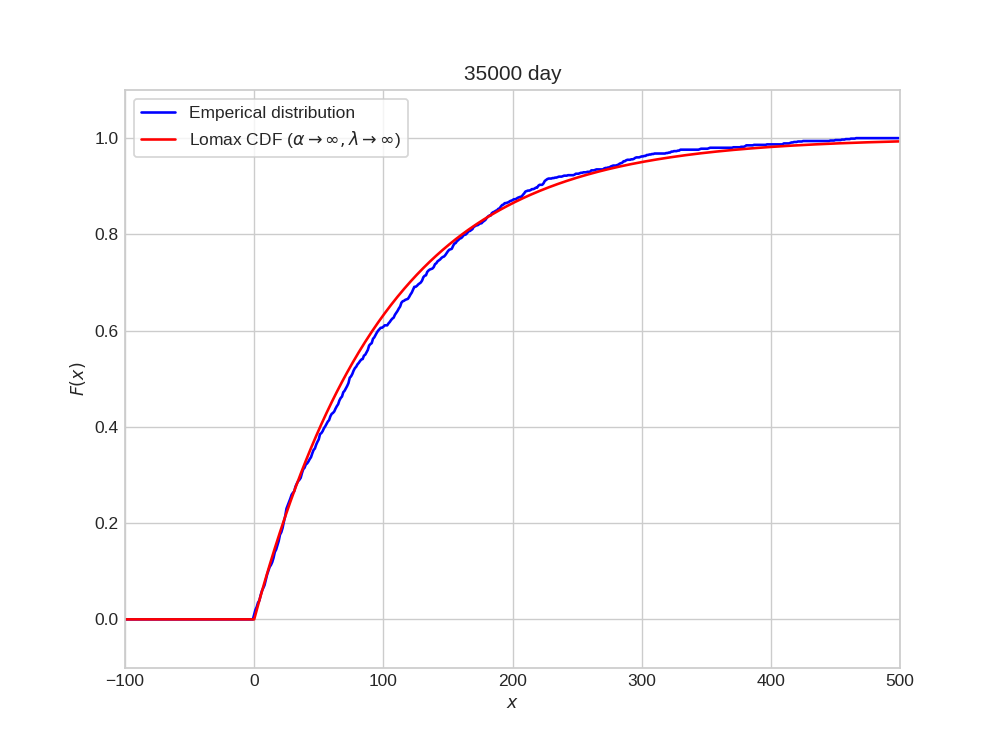

In [24]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
ax.set_ylim(-0.1, 1.1)

xlim = (-100, 500)
ax.set_xlim(*xlim)

xs = np.arange(*xlim, 1)
ys = [model.EDF(x) for x in xs]

pareto_ys = [lomax.cdf(x, alpha, scale=lambda_) for x in xs]

line, = ax.plot(xs, ys, 'b', label='Emperical distribution')
line_p, = ax.plot(xs, pareto_ys, 'r',
                  label=r'Lomax CDF ($\alpha\rightarrow\infty,\lambda\rightarrow\infty$)')
ax.legend(frameon=True, loc='upper left')

runs = int(days / period)
for i in range(runs):
    model.run(days=period)
    ys = [model.EDF(x) for x in xs]
    line.set_ydata(ys)
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.title("{} day".format(model.t))

Let's plot out probability curve as well:

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)

<IPython.core.display.Javascript object>


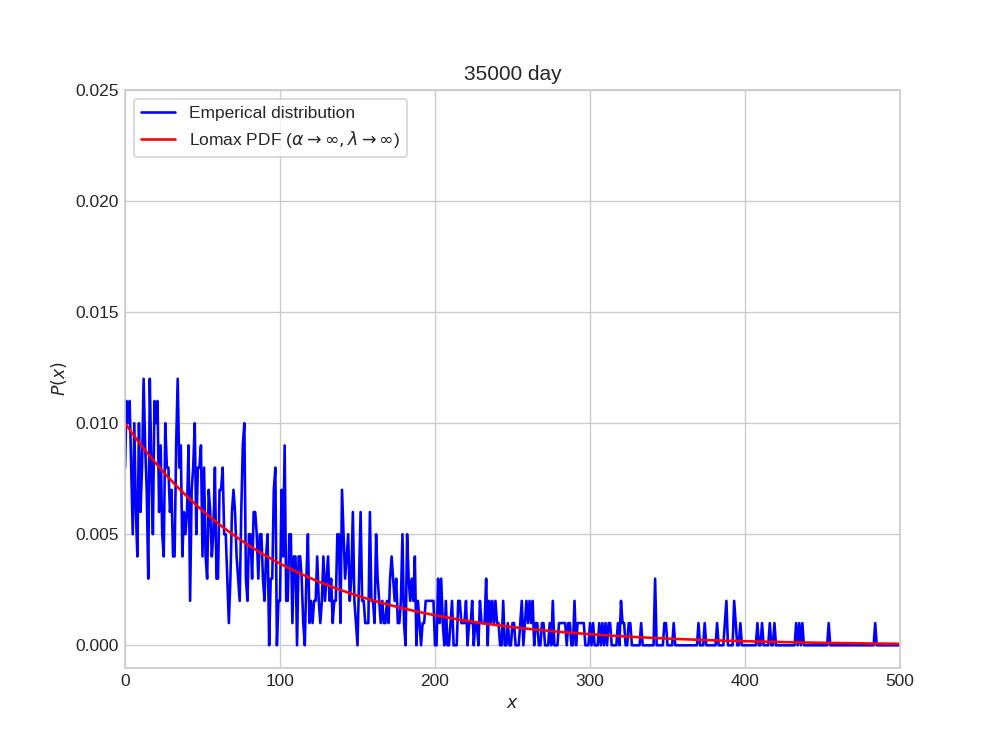

In [23]:
model = soc.Model(N, S)

fig, ax = plt.subplots(1,1)
ax.set_xlabel("$x$")
ax.set_ylabel("$P(x)$")
ax.set_ylim(-0.001, 0.025)

xlim = (0, 500)
ax.set_xlim(*xlim)

xs = np.arange(*xlim, 1)
ys = [model.EPF(x) for x in xs]

pareto_ys = [lomax.pdf(x, alpha, scale=lambda_) for x in xs]

line, = ax.plot(xs, ys, 'b', label='Emperical distribution')
line_p, = ax.plot(xs, pareto_ys, 'r',
                  label=r'Lomax PDF ($\alpha\rightarrow\infty,\lambda\rightarrow\infty$)')
ax.legend(frameon=True, loc='upper left')

runs = int(days / period)
for i in range(runs):
    model.run(days=period)
    ys = [model.EPF(x) for x in xs]
    line.set_ydata(ys)
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.title("{} day".format(model.t))

We can check hypothesis using Kolmogorov-Smirnov test ($H_0$: stack has Lomax CDF):

In [24]:
from scipy.stats import ks_1samp

In [25]:
ks_1samp(model.stack, lomax.cdf, args=(alpha, 0, lambda_))

KstestResult(statistic=0.027893040423353055, pvalue=0.4105282041303343)

Result: cannot reject hypothesis (5%)

## Stabilization time estimate

Now we need to estimate time to reach the Pareto curve. We will try two different variants of criteria for stack distribution to be stabilized.

Both approaches will use a sequence of values, expected to tend to meet bounds. To take into account the fact of stabilization we might require at least $K * len(sequence)$ __consecutive__ elements of sequence to meet bounds. However this will lead to time inefficiency: the more time needed to stabilize, the more bounded values need to prove this. In addition in case of unstable scoring function (like p-value in first approach) time can increase even more dramatically.

That's why for this task we will use __constant validation size__ $\Delta T$. According to test runs, suitable value is $\Delta T = 500$ (500 days needed to prove the stabilization).

First criteria based on the stack distribution and uses statistical tests p-value (Kolmogorov-Smirnov test, as above). Second one uses distance (L2) between stack and stack* from estimates above.

### Approach 1 — Use Kolmogorov-Smirnov test

For new created model, KS test (obviously) rejects that its stack distributed for Lomax.

In [28]:
N = 1000
a = np.random.randint(0, 100, size=N)

model = soc.Model(N, stack=a)
ks_1samp(model.stack, lomax.cdf, args=(alpha, 0, lambda_))

KstestResult(statistic=0.3715766910402548, pvalue=2.0523682061128425e-124)

We will continue model evolution process __until statistical test will reject__ this hypothesis on the 5% level. So it can be said that stack is statistically does not differ from Lomax sample. Due to obtained stabilization time estimations, reasonably will evolute model with __step of 100 days__.

In [35]:
def run_stat_criteria(model, alpha_stat, step_size=100, verbosity=False, dT=500):
    plt.rcParams['figure.figsize'] = (10, 5)
    if verbosity:
        fig, [ax1, ax2] = plt.subplots(1,2)

        ax1.set_xlabel("day")
        ax1.set_ylabel("p-value")
        ax1.set_ylim(-0.001, 0.055)

        pvalue = 0
        ys1 = [pvalue]
        xs1 = np.arange(len(ys1))
        line1, = ax1.plot(xs1, ys1, 'b', label='p-value')
        line_a, = ax1.plot(xs1, [alpha_stat for _ in xs1], 'r',
                           label='$\\alpha={}$'.format(alpha_stat))
        ax1.legend(frameon=True, loc='upper left')

        ax2.set_xlabel("$x$")
        ax2.set_ylabel("$F(x)$")
        ax2.set_ylim(-0.1, 1.1)

        xlim = (-100, 500)
        ax2.set_xlim(*xlim)

        xs2 = np.arange(*xlim, 1)
        ys2 = [model.EDF(x) for x in xs2]

        pareto_ys = [lomax.cdf(x, alpha, scale=lambda_) for x in xs2]

        line2, = ax2.plot(xs2, ys2, 'b', label='Emperical distribution')
        line_p, = ax2.plot(xs2, pareto_ys, 'r',
                          label=r'Lomax CDF ($\alpha\rightarrow\infty,\lambda\rightarrow\infty$)')
        ax2.legend(frameon=True, loc='upper left')

    acc = []
    while True:
        model.step()
        pvalue = ks_1samp(model.stack, lomax.cdf, args=(alpha, 0, lambda_)).pvalue

        if verbosity:
            ys1.append(pvalue)

        if verbosity and model.t % step_size == 0:
            xs1 = np.arange(len(ys1))
            line1.remove()
            line_a.remove()
            line1, = ax1.plot(xs1, ys1, 'b', label='p-value')
            line_a, = ax1.plot(xs1, [alpha_stat for _ in xs1], 'r',
                              label='$\\alpha={}$'.format(alpha_stat))

            ys2 = [model.EDF(x) for x in xs2]
            line2.set_ydata(ys2)

            plt.title("{} day".format(model.t))
            fig.canvas.draw()
            fig.canvas.flush_events()

        if pvalue > alpha_stat:
            acc.append(pvalue)

        if len(acc) > dT:
            if verbosity:
                print(f'Stabilized: day={model.t} , pvalue={pvalue}')
            break
    plt.rcParams['figure.figsize'] = (8, 6)

<IPython.core.display.Javascript object>


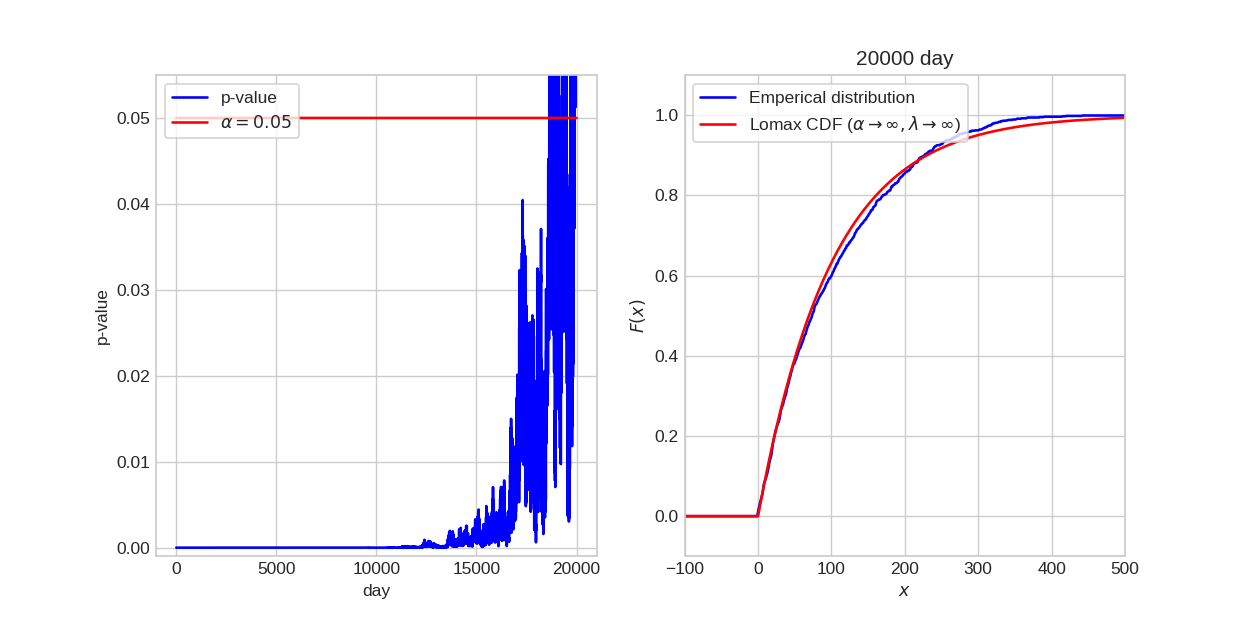

Stabilized: day=20035 , pvalue=0.1313476472592615
passed 179.88459587097168s


In [36]:
N = 1000
S = 100

model = soc.Model(N, S)

alpha_stat = 0.05

import time
t = time.time()
run_stat_criteria(model, alpha_stat, verbosity=True)
print(f'passed {time.time() - t}s')

Taking into account that Kolmogorov-Smirnov statistics is:

$$D=\sup_{x} \left\vert F_n(x) - F(x) \right\vert $$

and $H_0$ rejects if $\sqrt{N}D > K_\alpha$, we see, that this criteria actually limits L1-distance between CDF and EDF.

### Approach 2 — Use $\left\Vert c(t) - c^* \right\Vert_2$

First of all, simple calculations with normalization condition can lead to $C$:

$$\sum_{k=0}^{SN} \exp\left(- \frac{k}{S}\right) = \frac{1}{C}$$

Left part can be calculated directly:

$$\sum_{k=0}^{SN} \exp\left(- \frac{k}{S}\right) = \exp\left(- \frac{0}{S}\right) + \exp\left(- \frac{1}{S}\right)  + ... + \exp\left(- \frac{SN}{S}\right) = 1 + \exp\left(- \frac{1}{S}\right) + \exp ^ 2\left(- \frac{k}{S}\right) + \exp ^{SN} \left(- \frac{k}{S}\right) = X$$

It's a well known sum:
$$X = \frac{\exp^{SN+1}\left(- \frac{1}{S}\right) - 1}{\exp\left(- \frac{1}{S}\right) - 1}\quad\Rightarrow\quad
C = \frac{\exp\left(- \frac{1}{S}\right) - 1}{\exp\left(- \frac{SN+1}{S}\right) - 1}$$


Here we can use the probability formulation to break the evolution cycle. We can require that proportion of values in last $\Delta T$ elements greater than $\epsilon$ must be less than $\sigma$:

$$\mathbb{P} \left( \left\Vert c(t) - c^* \right\Vert_2 >= \frac{\epsilon(\sigma)}{\sqrt{N}} \right) \leq \sigma$$

For now let's assume $\sigma = 0.01$

To eliminate variance effect, $\epsilon$ should increase while $\sigma$ is decreasing. With respect to task estimate let's define:

$$\epsilon(\sigma) = \sqrt{\ln \sigma^{-1}} $$

In [32]:
from collections import deque

def run_norm_criteria(model, sigma, step_size=100, verbosity=False, dT=500):
    plt.rcParams['figure.figsize'] = (10, 5)

    epsilon = np.sqrt(np.log(1 / sigma))
    bound = epsilon / np.sqrt(model.N)
    if verbosity:
        fig, [ax1, ax2] = plt.subplots(1,2)

        ax1.set_xlabel("day")

        ys1 = [np.linalg.norm(model.coins() - model.stack_lim)]
        xs1 = np.arange(0, len(ys1) * step_size, step_size)
        line1, = ax1.plot(xs1, ys1, 'b', label=r'$\left\Vert c(t) - c^* \right\Vert_2$')
        line_a, = ax1.plot(xs1, [bound for _ in xs1], 'r',
                           label=r'$\epsilon/N$')
        ax1.legend(frameon=True, loc='upper left')

        ax2.set_xlabel("$x$")
        ax2.set_ylabel("$F(x)$")
        ax2.set_ylim(-0.1, 1.1)

        xlim = (-100, 500)
        ax2.set_xlim(*xlim)

        xs2 = np.arange(*xlim, 1)
        ys2 = [model.EDF(x) for x in xs2]

        pareto_ys = [lomax.cdf(x, alpha, scale=lambda_) for x in xs2]

        line2, = ax2.plot(xs2, ys2, 'b', label='Emperical distribution')
        line_p, = ax2.plot(xs2, pareto_ys, 'r',
                          label=r'Lomax CDF ($\alpha\rightarrow\infty,\lambda\rightarrow\infty$)')
        ax2.legend(frameon=True, loc='upper left')

    acc = deque([], dT)
    while True:
        model.step()
        dist = np.linalg.norm(model.coins() - model.stack_lim)
        acc.append(1 if dist >= bound else 0)

        if verbosity and model.t % step_size == 0:
            ys1.append(dist)
            xs1 = np.arange(0, len(ys1) * step_size, step_size)
            line1.remove()
            line_a.remove()
            line1, = ax1.plot(xs1, ys1, 'b', label='p-value')
            line_a, = ax1.plot(xs1, [bound for _ in xs1], 'r',
                               label=r'$\epsilon/N$')

            ys2 = [model.EDF(x) for x in xs2]
            line2.set_ydata(ys2)

            plt.title("{} day".format(model.t))
            fig.canvas.draw()
            fig.canvas.flush_events()

        if model.t > dT and sum(acc) / dT <= sigma:
            if verbosity:
                print(f'Stabilized: day={model.t} , P={sum(acc) / dT}')
            break
    plt.rcParams['figure.figsize'] = (8, 6)

<IPython.core.display.Javascript object>


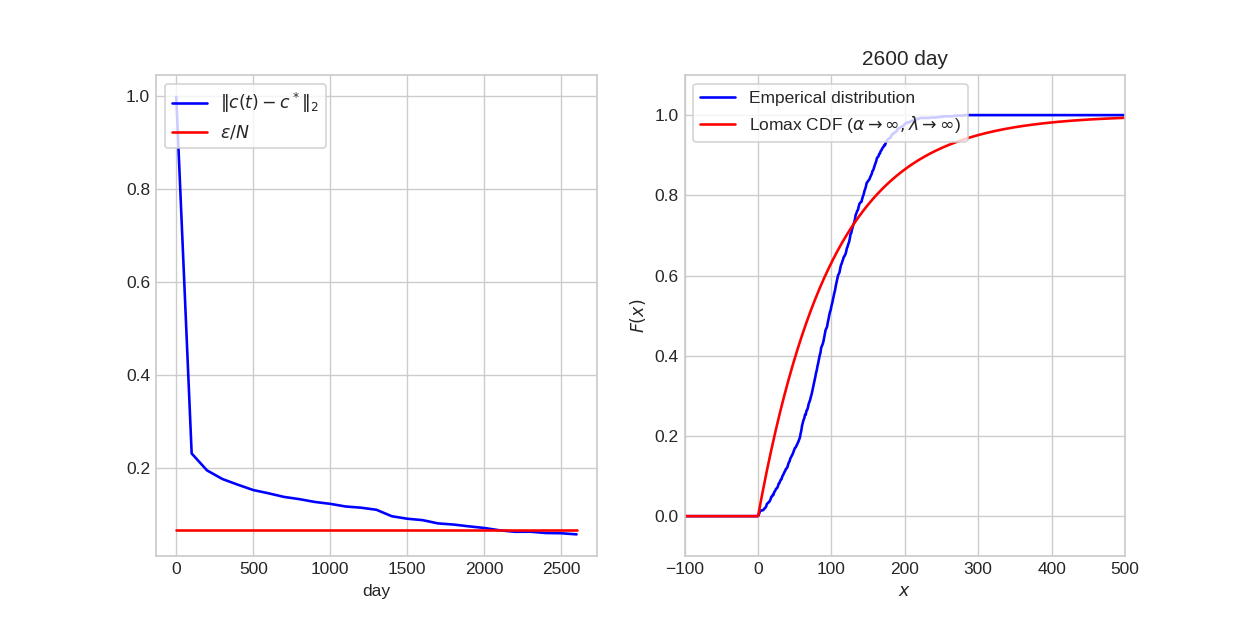

Stabilized: day=2625 , P=0.01
passed 48.36299777030945s


In [102]:
N = 1000
S = 100

model = soc.Model(N, S)

sigma = 0.01

import time
t = time.time()
run_norm_criteria(model, sigma, verbosity=True)
print(f'passed {time.time() - t}s')

Unlike the first aproach, this one does not limit distance between CDFs, however we gain probability condition instead: probability of coin diffrences cannot "go very high". This mean that we somehow restricted the PDFs insted.

## Stabilization time — dependence on $N$ and initial distibution

First let's figure out, how stabilization time $T$ depends on $N$. We will use second approach of stabilization criteria due to it's time economy. This means that we will restrict PDFs.

We will fix initial distribution to "all equal" as it was before for now.

<IPython.core.display.Javascript object>


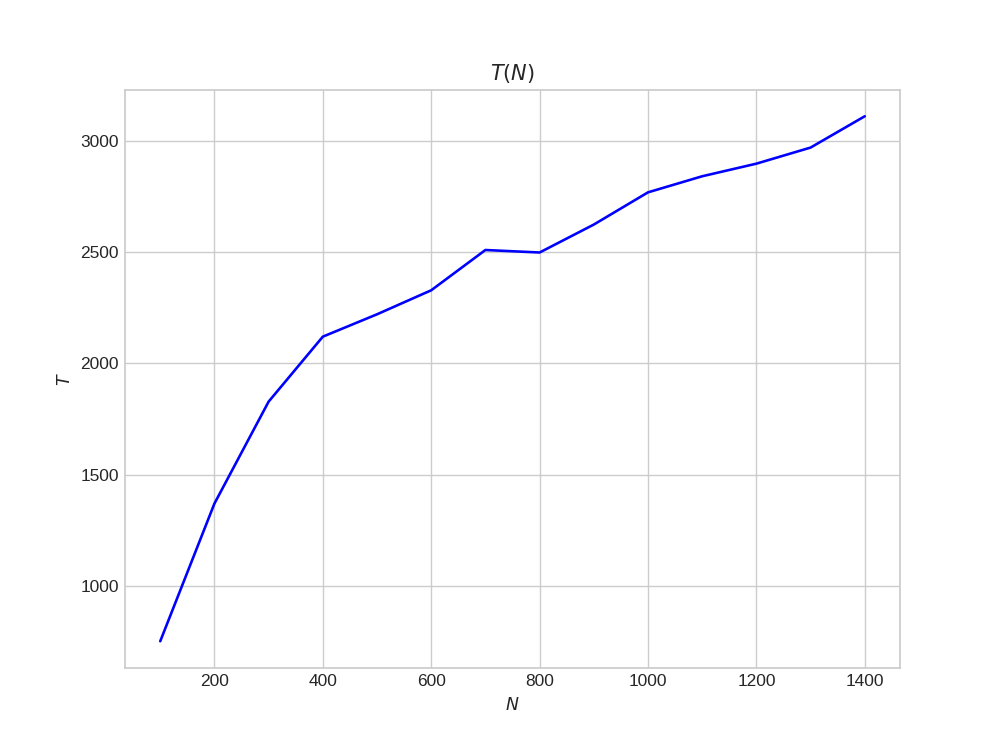

Text(0.5, 1.0, '$T(N)$')

In [116]:
S = 100
sigma = 0.01

N_grid = np.arange(100, 1500, 100)
repeat = 5
Ts = []

plt.rcParams['figure.figsize'] = (8, 6)
fig, ax = plt.subplots(1,1)
line = None

for N in N_grid:
    t = time.time()
    T_res = []
    for _ in range(repeat):
        model = soc.Model(N, S)
        run_norm_criteria(model, sigma)
        T_res.append(model.t)
    passed = time.time() - t
    
    Ts.append(np.average(T_res))

    xs = np.array(N_grid[:len(Ts)])
    ys = np.array(Ts)

    ax.clear()
    ax.set_title("$T(N)$ (N={} took {}s, repeat={})".format(N, round(passed, 2), repeat))
    ax.set_xlabel("$N$")
    ax.set_ylabel("$T$")
    ax.plot(xs, ys, 'b')
    fig.canvas.draw()
    fig.canvas.flush_events()
ax.set_title("$T(N)$")

To recognize the trend let's simply try on two basic variants using least squares: __polynomial__ and __logarithmic__ functions.

$$\widetilde{T}(N) = a \ln \left(N + \exp \left(-\frac{b}{a}\right)\right)$$

$$\widetilde{T}(N) = a x ^ b$$

_$\exp \left(-b/a\right)$ needed to meet the trend that $T(N) \rightarrow 0$ when $N \rightarrow 0$_

In [157]:
from scipy.optimize import curve_fit

In [158]:
def approx_ln(x, a, b):
    return a * np.log(x + np.exp(-b / a)) + b

In [159]:
def approx_pol(x, a, b):
    return a * np.power(x, b)

<IPython.core.display.Javascript object>


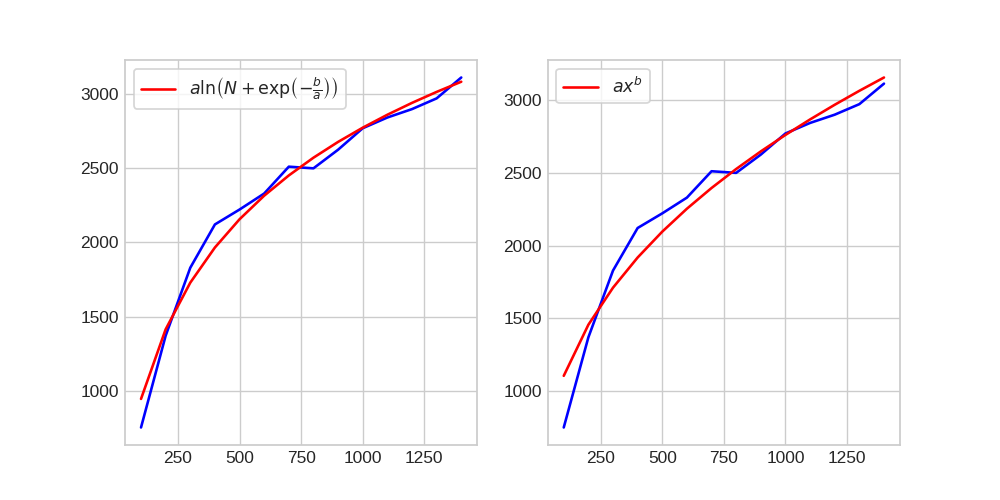

In [168]:
lnopt, _ = curve_fit(approx_ln, N_grid, Ts)
polopt, _ = curve_fit(approx_pol, N_grid, Ts)

plt.rcParams['figure.figsize'] = (8, 4)
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(N_grid, Ts, 'b')
ax1.plot(N_grid, [approx_ln(n, *lnopt) for n in N_grid], 'r',
         label=r'$a \ln \left(N + \exp \left(-\frac{b}{a}\right)\right)$')
ax1.legend(frameon=True, loc='upper left')
ax2.plot(N_grid, Ts, 'b')
ax2.plot(N_grid, [approx_pol(n, *polopt) for n in N_grid], 'r', label=r'$a x ^ b$')
ax2.legend(frameon=True, loc='upper left')
plt.show()

Based on obtained data we can see, that logarithmic function fits better then polynomial one.

### Initial distribution

Now we will examine the dependence between initial distribution $A$ and stabilization time.

First let's check out different basic distributions and see, how the stabilization process will change. We will preserve __sample mean__ and pay attention to __sample variance__.

#### Uniform distribution

In [94]:
tester = np.array([int(s) for s in lomax.rvs(alpha, size=N, scale=lambda_)])

In [102]:
np.linalg.norm(np.array([int(s) for s in norm.rvs(size=N, loc=100)]) - tester)

3256.185037739717

In [103]:
np.linalg.norm(np.array([int(s) for s in uniform.rvs(size=N, scale=200)]) - tester)

3824.6495264272253

In [104]:
np.linalg.norm(np.array([100 for _ in range(N)]) - tester)

3255.2532927561874

In [105]:
np.linalg.norm(np.array([int(s) for s in lomax.rvs(3, size=N, scale=200)]) - tester)

6184.877201691235

In [87]:
np.var(np.array([int(s) for s in norm.rvs(size=N, loc=100)]))

1.061424

In [88]:
np.var(np.array([int(s) for s in uniform.rvs(size=N, scale=200)]))

3348.113151

In [89]:
np.var(np.array([100 for _ in range(N)]))

0.0

In [90]:
np.var(np.array([int(s) for s in lomax.rvs(3, size=N, scale=200)]))

21034.690924

<IPython.core.display.Javascript object>


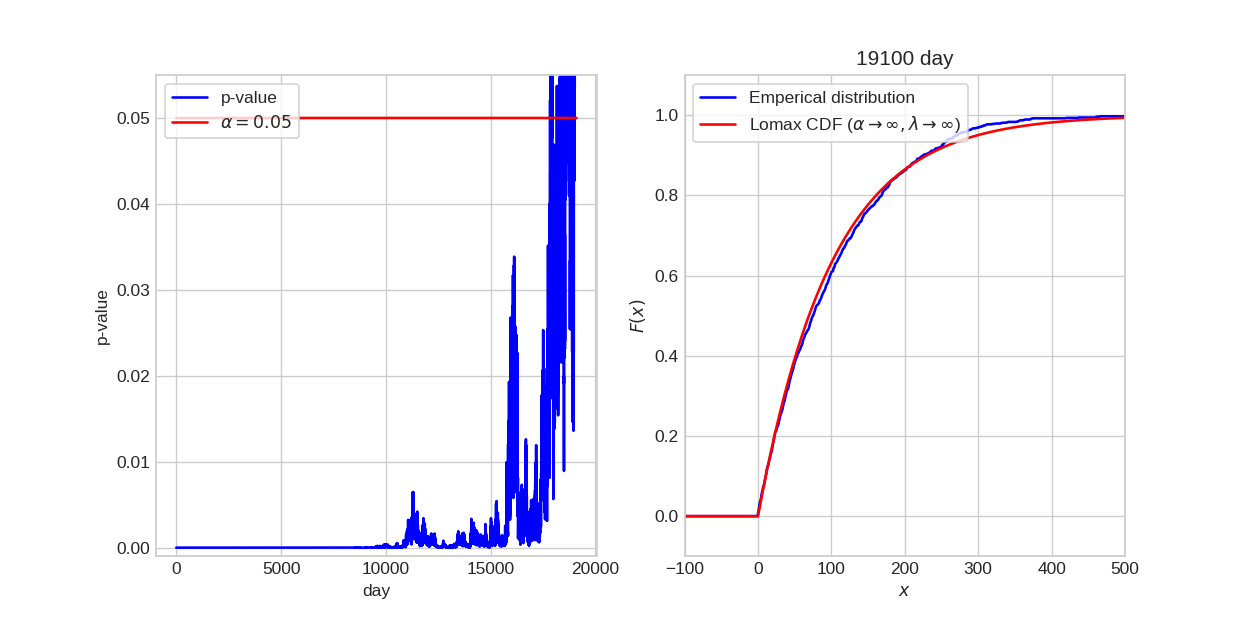

Stabilized: day=19132 , pvalue=0.19470470609546042
passed 167.69583439826965s


In [36]:
from scipy.stats import uniform

N = 1000
A = np.array([int(s) for s in uniform.rvs(size=N, scale=200)])

model = soc.Model(N, stack=A)

import time
t = time.time()
run_stat_criteria(model, 0.05, verbosity=True)
print(f'passed {time.time() - t}s')

#### Normal distribution

<IPython.core.display.Javascript object>


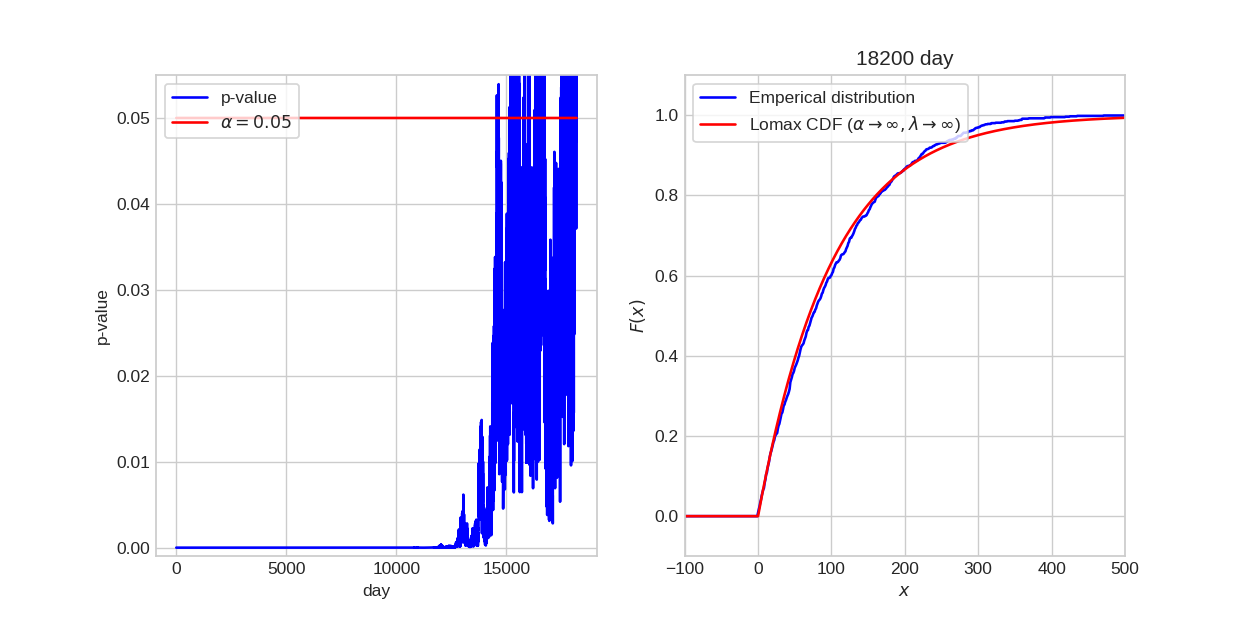

Stabilized: day=18274 , pvalue=0.08619509703843264
passed 156.54540181159973s


In [37]:
from scipy.stats import norm

N = 1000
A = np.array([int(s) for s in norm.rvs(size=N, loc=100)])

model = soc.Model(N, stack=A)

import time
t = time.time()
run_stat_criteria(model, 0.05, verbosity=True)
print(f'passed {time.time() - t}s')

#### Lomax distribution

<IPython.core.display.Javascript object>


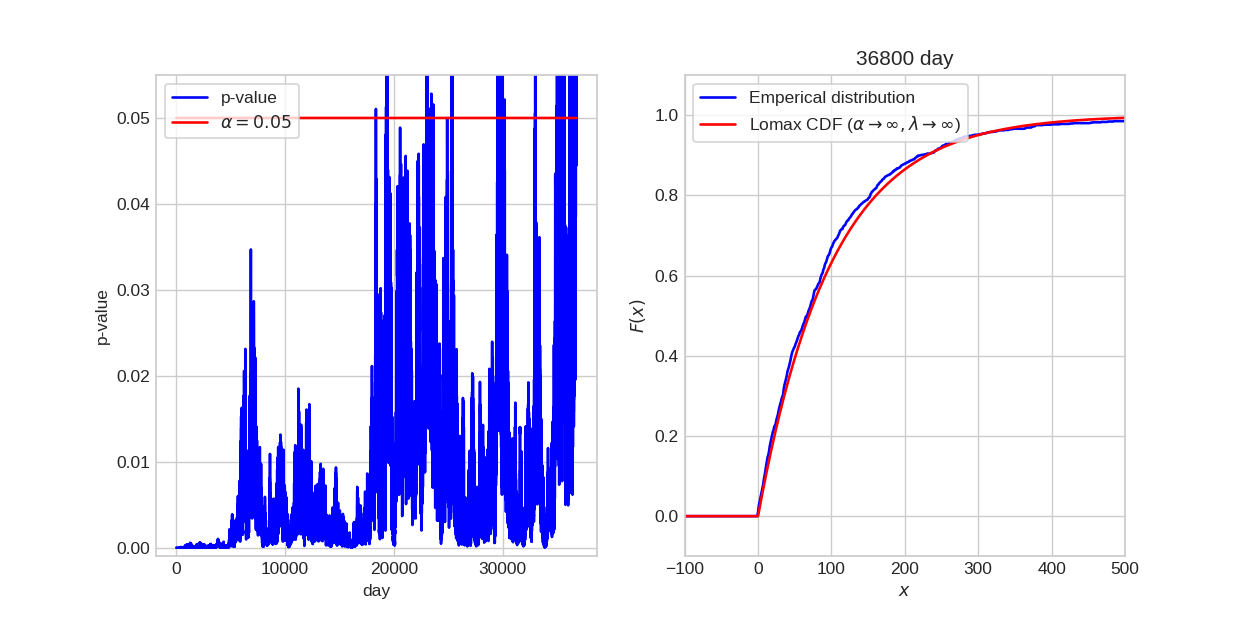

Stabilized: day=36835 , pvalue=0.1053610347092484
passed 330.7497012615204s


In [40]:
from scipy.stats import lomax

N = 1000
A = np.array([int(s) for s in lomax.rvs(3, size=N, scale=200)])

model = soc.Model(N, stack=A)

import time
t = time.time()
run_stat_criteria(model, 0.05, verbosity=True)
print(f'passed {time.time() - t}s')

<IPython.core.display.Javascript object>


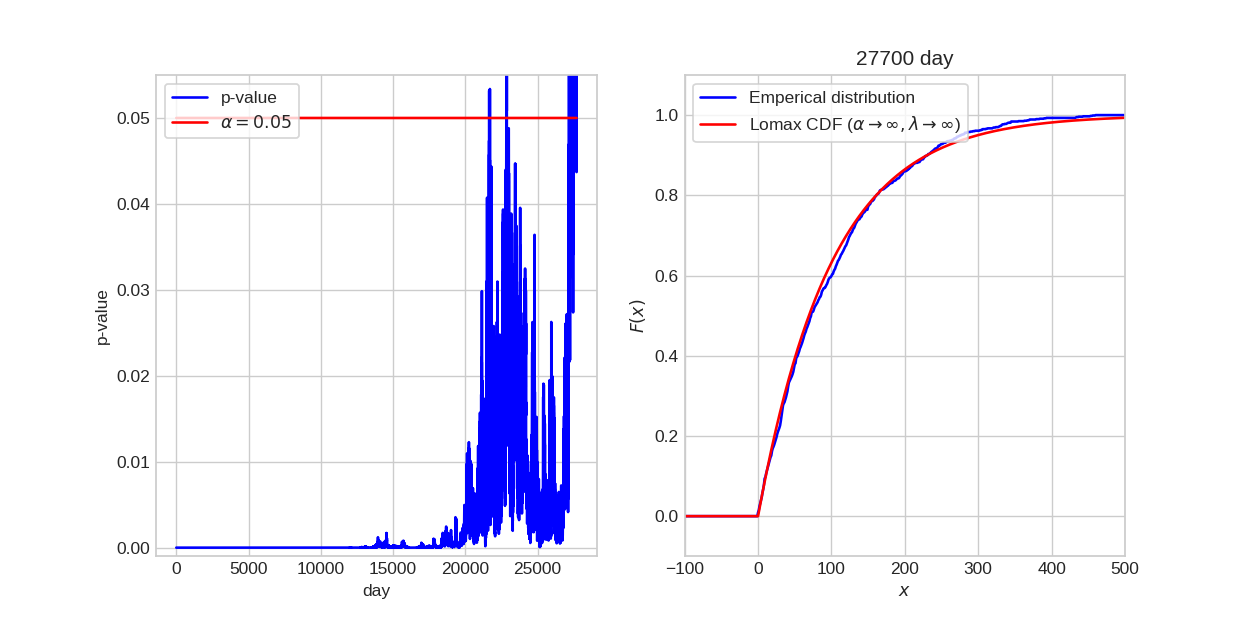

Stabilized: day=27742 , pvalue=0.07837209399230982
passed 257.12807178497314s


In [107]:
N = 1000
A = np.array([100 for _ in range(N)])

model = soc.Model(N, stack=A)

import time
t = time.time()
run_stat_criteria(model, 0.05, verbosity=True)
print(f'passed {time.time() - t}s')

Let's sum up all results in a table

| Distribution | Stabilization time | Sample variance | L2-distance from trend sample |
| --- | --- | --- | --- |
| Normal  | 18274 | 1    | 3256 |
| Uniform | 19132 | 3348 | 3824 |
| Const   | 27742 | 0    | 3255 |
| Lomax   | 36835 | 21034| 6184 |

As we can see from table, there is no simple connection between sample base parameters and stabilization time. However let's see, how they affect it based on normal and constant initial distribution.

### Average and variance effect on $T$
#### Sample average $E$

In [129]:
plt.rcParams['figure.figsize'] = (6, 3)

In [ ]:
N = 50
A = np.array([500 for _ in range(N)])

model = soc.Model(N, stack=A)

import time
t = time.time()
run_norm_criteria(model, 0.01, verbosity=True)
print(f'passed {time.time() - t}s')

In [ ]:
N = 100
repeat = 1
base_scale = 1
# loc_grid = np.arange(100, 300, 100)
loc_grid = np.array([40, 50, 60, 70, 80])

plt.rcParams['figure.figsize'] = (8, 6)
fig, ax = plt.subplots(1,1)
line = None
Ts = []

for loc in loc_grid:
    t = time.time()
    T_res = []
    for _ in range(repeat):
        model = soc.Model(N, stack=np.array([int(s) for s in norm.rvs(size=N, loc=loc, scale=base_scale)]))
        run_stat_criteria(model, 0.05)
        T_res.append(model.t)
    passed = time.time() - t

    Ts.append(np.average(T_res))

    xs = np.array(loc_grid[:len(Ts)])
    ys = np.array(Ts)

    ax.clear()
    ax.set_title("$T(E)$ (E={} took {}s, repeat={})".format(loc, round(passed, 2), repeat))
    ax.set_xlabel("$E$")
    ax.set_ylabel("$T$")
    ax.plot(xs, ys, 'b')
    fig.canvas.draw()
    fig.canvas.flush_events()
ax.set_title("$T(E)$")